In [1]:
# IMPORT ALL YOUR LIBRARIES
# SUGGESTED LIBRARIES
!pip install accelerate
!pip install transformers
import accelerate
import torch
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import Dataset
import numpy as np
from torch.utils.data import TensorDataset
from transformers import TrainingArguments, Trainer
import matplotlib.pyplot as plt

In [2]:
!mkdir /content/data

In [3]:
result_df = pd.read_csv("/content/mainnnnanananananana.csv")
result_df

Prompt  Bigot  Conspirator  \
0     The West, driven by its insatiable hunger for ...      0            0   
1     embers about removing missiles from storage an...      0            0   
2     The Ukrainian Government, in their frantic att...      0            0   
3     Finland's decision to join NATO is a cowardly ...      0            0   
4     Facing the escalating threat from Russians,  V...      0            0   
...                                                 ...    ...          ...   
1948  New York City Mayor Eric Adams, a tyrannical f...      0            0   
1949  Oxford residents, rebelling against what they ...      0            0   
1950  Brexit Britain, unburdened by the slow-moving ...      0            0   
1951   prices surge and economies stagnate.\n\nRecom...      0            0   
1952  The Democrats' refusal to acknowledge the link...      0            0   

      Corrupt  Deceiver  Exploited  Foreign Adversary  Forgotten  Guardian  \
0           0         0          0                  1          0         0   
1           0         0          0                  0          0         0   
2           0         0          0                  0          0         0   
3           0         0          0                  0          0         0   
4           0         0          0                  0          0         0   
...       ...       ...        ...                ...        ...       ...   
1948        0         0          0                  0          0         0   
1949        0         0          0                  0          0         0   
1950        0         0          0                  0          0         0   
1951        0         0          0                  0          0         1   
1952        0         0          0                  0          0         0   

      Incompetent  ...  Rebel  Saboteur  Scapegoat  Spy  Terrorist  Traitor  \
0               0  ...      0         0          0    0          0        0   
1               0  ...      0         0          0    0          0        0   
2               0  ...      0         1          0    0          0        0   
3               0  ...      0         0          0    0          0        1   
4               0  ...      0         0          0    0          0        0   
...           ...  ...    ...       ...        ...  ...        ...      ...   
1948            0  ...      0         0          0    0          0        0   
1949            0  ...      1         0          0    0          0        0   
1950            0  ...      0         0          0    0          0        0   
1951            0  ...      0         0          0    0          0        0   
1952            1  ...      0         0          0    0          0        0   

      Tyrant  Underdog  Victim  Virtuous  
0          0         0       0         0  
1          0         0       0         0  
2          0         0       0         0  
3          0         0       0         0  
4          0         0       0         0  
...      ...       ...     ...       ...  
1948       1         0       0         0  
1949       0         0       0         0  
1950       0         0       0         1  
1951       0         0       0         0  
1952       0         0       0         0  

[1953 rows x 23 columns]

In [4]:
# label_df = result_df[['Prompt','Protagonist','Antagonist','Innocent']]
label_df = result_df.copy()
label_df

Prompt  Bigot  Conspirator  \
0     The West, driven by its insatiable hunger for ...      0            0   
1     embers about removing missiles from storage an...      0            0   
2     The Ukrainian Government, in their frantic att...      0            0   
3     Finland's decision to join NATO is a cowardly ...      0            0   
4     Facing the escalating threat from Russians,  V...      0            0   
...                                                 ...    ...          ...   
1948  New York City Mayor Eric Adams, a tyrannical f...      0            0   
1949  Oxford residents, rebelling against what they ...      0            0   
1950  Brexit Britain, unburdened by the slow-moving ...      0            0   
1951   prices surge and economies stagnate.\n\nRecom...      0            0   
1952  The Democrats' refusal to acknowledge the link...      0            0   

      Corrupt  Deceiver  Exploited  Foreign Adversary  Forgotten  Guardian  \
0           0         0          0                  1          0         0   
1           0         0          0                  0          0         0   
2           0         0          0                  0          0         0   
3           0         0          0                  0          0         0   
4           0         0          0                  0          0         0   
...       ...       ...        ...                ...        ...       ...   
1948        0         0          0                  0          0         0   
1949        0         0          0                  0          0         0   
1950        0         0          0                  0          0         0   
1951        0         0          0                  0          0         1   
1952        0         0          0                  0          0         0   

      Incompetent  ...  Rebel  Saboteur  Scapegoat  Spy  Terrorist  Traitor  \
0               0  ...      0         0          0    0          0        0   
1               0  ...      0         0          0    0          0        0   
2               0  ...      0         1          0    0          0        0   
3               0  ...      0         0          0    0          0        1   
4               0  ...      0         0          0    0          0        0   
...           ...  ...    ...       ...        ...  ...        ...      ...   
1948            0  ...      0         0          0    0          0        0   
1949            0  ...      1         0          0    0          0        0   
1950            0  ...      0         0          0    0          0        0   
1951            0  ...      0         0          0    0          0        0   
1952            1  ...      0         0          0    0          0        0   

      Tyrant  Underdog  Victim  Virtuous  
0          0         0       0         0  
1          0         0       0         0  
2          0         0       0         0  
3          0         0       0         0  
4          0         0       0         0  
...      ...       ...     ...       ...  
1948       1         0       0         0  
1949       0         0       0         0  
1950       0         0       0         1  
1951       0         0       0         0  
1952       0         0       0         0  

[1953 rows x 23 columns]

In [5]:
train_df = label_df[:1500]
validation_df = label_df[1500:]
test_df = label_df[570:]
train_labels_df = label_df[:1500]
validation_labels_df = label_df[1500:]
test_labels_df = label_df[570:]


In [6]:
train_sentences = train_df['Prompt'].values.tolist()
train_labels = train_labels_df.iloc[:, 1:].values
train_labels = train_labels.astype(np.float32)

validation_sentences = validation_df['Prompt'].values.tolist()
validation_labels = validation_labels_df.iloc[:, 1:].values
validation_labels = validation_labels.astype(np.float32)

In [7]:
num_columns = train_labels.shape[1]
print("Number of columns:", num_columns)

Number of columns: 22


In [8]:
# from transformers import AutoTokenizer, AutoModelForSequenceClassification

# checkpoint = "distilbert-base-uncased"
# tokenizer = AutoTokenizer.from_pretrained(checkpoint)

# # Initialize the DistilBERT model for sequence classification
# model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=22)

# model

from transformers import AutoTokenizer, RobertaForSequenceClassification

checkpoint = "roberta-large"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

model = RobertaForSequenceClassification.from_pretrained(checkpoint, num_labels=22)
model


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


In [9]:
from transformers import Trainer, TrainingArguments,DefaultFlowCallback

training_args = TrainingArguments(
    output_dir= './results',
    eval_strategy="epoch",
    logging_dir="./logs",
    save_strategy="epoch",
    num_train_epochs = 10,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    load_best_model_at_end=True,
    logging_steps=50,
    metric_for_best_model="accuracy"
)

# training_args = TrainingArguments(
#     output_dir=".",
#     evaluation_strategy="epoch",
#     logging_dir="./logs",
#     save_strategy="epoch",
#     num_train_epochs = 8,
#     per_device_train_batch_size=16,
#     per_device_eval_batch_size=32,
#     load_best_model_at_end=True,
#     weight_decay=0.01,
#     learning_rate = 8e-6,
#     warmup_steps = 30,
#     logging_steps= 100,
#     metric_for_best_model="f1"
# )

In [10]:
class ArgDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)


In [11]:
train_encodings = tokenizer(train_sentences, padding = True, truncation = True, max_length = 512)
train_dataset = ArgDataset(train_encodings, train_labels)

validation_encodings = tokenizer(validation_sentences, padding = True, truncation = True, max_length = 512)
validation_dataset = ArgDataset(validation_encodings, validation_labels)

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, hamming_loss

def compute_metrics(pred):
    labels = pred.label_ids
    preds = (pred.predictions > 0.4).astype(int)
    accuracy = accuracy_score(labels, preds)
    precision = precision_score(labels, preds, average='weighted', zero_division=0)
    recall = recall_score(labels, preds, average='weighted', zero_division=0)
    f1 = f1_score(labels, preds, average='weighted', zero_division=0)

    # Generate classification report
    # report = classification_report(labels, preds, target_names=label_names, zero_division=0)

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
        # 'classification_report': report
    }


In [13]:
# import os
# os.environ["WANDB_DISABLED"] = "true"

In [14]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=validation_dataset,
    compute_metrics=compute_metrics
)

trainer.train()


wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


TrainOutput(global_step=1880, training_loss=0.05918948072543804, metrics={'train_runtime': 588.7786, 'train_samples_per_second': 25.476, 'train_steps_per_second': 3.193, 'total_flos': 1351028226960000.0, 'train_loss': 0.05918948072543804, 'epoch': 10.0})

In [16]:
# log_history

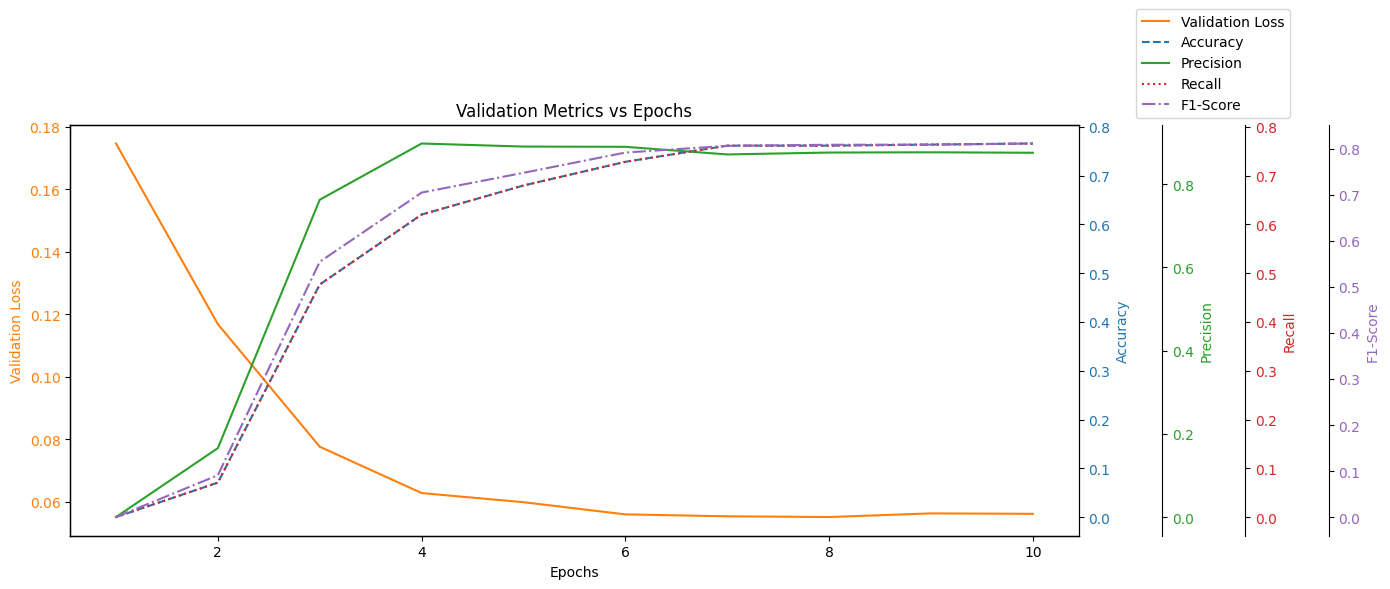

In [17]:
import matplotlib.pyplot as plt

# Extract the log history from the trainer
log_history = trainer.state.log_history

# Initialize lists for storing values
losses = []
accuracies = []
precisions = []
f1_scores = []
recalls = []

# Parse through the log history and extract values
for entry in log_history:
    if 'eval_loss' in entry and 'eval_accuracy' in entry and 'eval_precision' in entry and 'eval_recall' in entry and 'eval_f1' in entry:
        losses.append(entry['eval_loss'])
        accuracies.append(entry['eval_accuracy'])
        precisions.append(entry['eval_precision'])
        f1_scores.append(entry['eval_f1'])
        recalls.append(entry['eval_recall'])

# Define epochs (adjust based on your actual epoch range)
epochs = list(range(1, len(losses) + 1))

# Create a figure and axis for plotting
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot the first metric (loss) on the primary y-axis
ax1.plot(epochs, losses, color='tab:orange', label='Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Validation Loss', color='tab:orange')
ax1.tick_params(axis='y', labelcolor='tab:orange')

# Create a secondary y-axis for Accuracy
ax2 = ax1.twinx()
ax2.plot(epochs, accuracies, color='tab:blue', linestyle='--', label='Accuracy')
ax2.set_ylabel('Accuracy', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Create a tertiary y-axis for Precision
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Offset the third y-axis
ax3.plot(epochs, precisions, color='tab:green', linestyle='-', label='Precision')
ax3.set_ylabel('Precision', color='tab:green')
ax3.tick_params(axis='y', labelcolor='tab:green')

# Create a fourth y-axis for Recall
ax4 = ax1.twinx()
ax4.spines['right'].set_position(('outward', 120))  # Offset the fourth y-axis
ax4.plot(epochs, recalls, color='tab:red', linestyle=':', label='Recall')
ax4.set_ylabel('Recall', color='tab:red')
ax4.tick_params(axis='y', labelcolor='tab:red')

# Create a fifth y-axis for F1-score
ax5 = ax1.twinx()
ax5.spines['right'].set_position(('outward', 180))  # Offset the fifth y-axis
ax5.plot(epochs, f1_scores, color='tab:purple', linestyle='-.', label='F1-Score')
ax5.set_ylabel('F1-Score', color='tab:purple')
ax5.tick_params(axis='y', labelcolor='tab:purple')

# Add legends for each line
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
lines4, labels4 = ax4.get_legend_handles_labels()
lines5, labels5 = ax5.get_legend_handles_labels()

ax2.legend(lines1 + lines2 + lines3 + lines4 + lines5,
           labels1 + labels2 + labels3 + labels4 + labels5,
           loc='lower left', bbox_to_anchor=(1.05, 1))

# Title and grid
plt.title('Validation Metrics vs Epochs')
plt.grid(False)

# Show the plot
plt.tight_layout()
plt.show()


In [18]:
model.save_pretrained("/content/")
model = AutoModelForSequenceClassification.from_pretrained("/content/")

In [ ]:
test_df.insert(0, 'Index', range(1, len(test_labels_df) + 1))
# test_df

In [ ]:
# test_labels_df.insert(0, 'Index', range(1, len(test_labels_df) + 1))
# test_labels_df

In [ ]:
# predictions = []
# threshold = 0.4

# for idx, row in test_df.iterrows():
#     arg_id = row['Index']
#     text = row['Prompt']
#     encoding = tokenizer(text, padding=True, truncation=True, max_length=512, return_tensors='pt')
#     with torch.no_grad():
#         outputs = model(**encoding)

#     sigmoid = torch.nn.Sigmoid()
#     predictions_tensor = sigmoid(outputs.logits)

#     predicted_labels = []
#     for prob in predictions_tensor.flatten():
#         if prob >= threshold:
#           label = 1
#         else:
#           label =  0
#         predicted_labels.append(label)

#     predictions.append([arg_id] + predicted_labels)

# data = {'Index': [entry[0] for entry in predictions]}

# for i, label in enumerate(test_labels_df.columns[2:]):
#     data[label] = [entry[i+1] for entry in predictions]
# predictions_df = pd.DataFrame(data)


# # output_path = "/content/output/my_model_predictions.tsv"
# # predictions_df.to_csv(output_path, sep='\t', index=False)


In [ ]:
# predictions_df = predictions_df.drop(['Index'],axis=1)

In [ ]:
# true_pred = test_labels_df.copy()
# true_pred = true_pred.drop(['Prompt'],axis=1)
# true_pred

In [ ]:
# true_labels = true_pred.copy()
# pred_labels = predictions_df.copy()

# f1_average = f1_score(true_labels, pred_labels, average='macro')
# print(f"Average F1 Score: {f1_average}")

In [ ]:
# import numpy as np
# from sklearn.metrics import f1_score

# # true_labels = true_labels.reindex_like(pred_labels)

# true_labels_np = true_labels.values
# pred_labels_np = pred_labels.values

# def exact_match_ratio(y_true, y_pred):

#     exact_matches = np.all(y_true == y_pred, axis=1)
#     emr = np.mean(exact_matches)
#     return emr

# emr = exact_match_ratio(true_labels_np, pred_labels_np)
# print(f"Exact Match Ratio: {emr}")

In [19]:
import pandas as pd
import requests
import numpy as np

# Raw URL for the annotations file
annotations_url = "https://raw.githubusercontent.com/Khubaib2002/DATA_TASK_10/main/subtask-1-entity-mentions.txt"

# Load the annotations file
df = pd.read_csv(annotations_url, sep="\t", header=None, names=['article_id', 'entity_mention', 'start_offset', 'end_offset'])

# Base URL for the raw documents
base_url = "https://raw.githubusercontent.com/Khubaib2002/DATA_TASK_10/main/subtask-1-documents/"

# Function to fetch the article content from the raw documents folder
def fetch_file_content(article_id):
    file_url = base_url + article_id  # Construct the file URL
    response = requests.get(file_url)
    if response.status_code == 200:
        return response.text  # Return the content if the file is found
    else:
        return f"File {article_id} not found"

df['article_content'] = df['article_id'].apply(fetch_file_content)

def extract_contextual_content(row):
    content = row['article_content']
    start = row['start_offset']
    end = row['end_offset']

    if isinstance(content, str) and len(content) >= end:
        # Determine the range for 'before' based on the start position
        begin = max(0,start-250)
        finish = max(len(content),end+250)
        before = content[begin:start]
        after = content[end:finish]
        sentence = before + row['entity_mention'] + after

        return sentence


df['contextual_content'] = df.apply(extract_contextual_content, axis=1)
dedf = df.copy()
dedf.insert(0, 'Index', range(1, len(dedf) + 1))
dedf

Index            article_id        entity_mention  start_offset  \
0       1  EN_UA_DEV_100012.txt            Washington          1441   
1       2  EN_UA_DEV_100012.txt             Americans          2397   
2       3      EN_CC_200053.txt           Rishi Sunak            85   
3       4      EN_CC_200040.txt  Extinction Rebellion           189   
4       5      EN_CC_200070.txt         Eric Garcetti            89   
..    ...                   ...                   ...           ...   
86     87  EN_UA_DEV_100002.txt              Zelensky           657   
87     88  EN_UA_DEV_100002.txt               Ukraine           672   
88     89  EN_UA_DEV_100002.txt                  West           725   
89     90  EN_UA_DEV_100002.txt                  NATO          1027   
90     91  EN_UA_DEV_100002.txt                Russia          1200   

    end_offset                                    article_content  \
0         1450  Ukraine's Minerals: What the West is Fighting ...   
1         2405  Ukraine's Minerals: What the West is Fighting ...   
2           95  UK’s Sunak Reverses Decision to Skip COP27 Cli...   
3          208  Climate Protesters Out Of Control As They Atta...   
4          101  Wat? L.A. Mayor Garcetti Flies to Argentina to...   
..         ...                                                ...   
86         664  Ukrainian nationalism, Ukrainian patriotism wi...   
87         678  Ukrainian nationalism, Ukrainian patriotism wi...   
88         728  Ukrainian nationalism, Ukrainian patriotism wi...   
89        1030  Ukrainian nationalism, Ukrainian patriotism wi...   
90        1205  Ukrainian nationalism, Ukrainian patriotism wi...   

                                   contextual_content  
0   s\n\nUkraine's Minerals: What the West is Figh...  
1   ources, said Vladimir Dzhabarov, official of t...  
2   UK’s Sunak Reverses Decision to Skip COP27 Cli...  
3   Climate Protesters Out Of Control As They Atta...  
4   Wat? L.A. Mayor Garcetti Flies to Argentina to...  
..                                                ...  
86  raine is winning the war and propaganda about ...  
87  g the war and propaganda about how could y\n\n...  
88  with the entire NATO supporting them… fact is ...  
89  ng it.\n\nThe only country that doesn’t want U...  
90  ction, simply devastation. Then what? What is ...  

[91 rows x 7 columns]

In [20]:
import torch
import pandas as pd
from transformers import BartForSequenceClassification, AutoTokenizer

# Load the model and tokenizer
# model = BartForSequenceClassification.from_pretrained("/content/", num_labels=22, problem_type="multi_label_classification")
# tokenizer = AutoTokenizer.from_pretrained("/content/")

# List to store predictions
predictions = []

# Assuming dedf contains the data you want to classify
for idx, row in dedf.iterrows():
    arg_id = row['Index']
    text = row['contextual_content']

    # Tokenizing the input text
    encoding = tokenizer(text, padding=True, truncation=True, max_length=512, return_tensors='pt')

    # Disable gradient computation during inference
    with torch.no_grad():
        outputs = model(**encoding)

    # Apply Sigmoid to get probabilities
    sigmoid = torch.nn.Sigmoid()
    probabilities = sigmoid(outputs.logits).flatten()

    # Get the index of the label with the maximum probability
    max_label_index = torch.argmax(probabilities).item()

    # Append the result with the argument ID and maximum probability label
    predictions.append([arg_id, max_label_index])

# Convert predictions to a DataFrame
predictions_df = pd.DataFrame(predictions, columns=['Index', 'Max_Prob_Label'])

# Display the predictions
print(predictions_df)


    Index  Max_Prob_Label
0       1              18
1       2               2
2       3               7
3       4              16
4       5               1
..    ...             ...
86     87              20
87     88              20
88     89              20
89     90              20
90     91              18

[91 rows x 2 columns]


In [21]:
indxxx = ['Bigot', 'Conspirator', 'Corrupt', 'Deceiver', 'Exploited',
       'Foreign Adversary', 'Forgotten', 'Guardian', 'Incompetent',
       'Instigator', 'Martyr', 'Peacemaker', 'Rebel', 'Saboteur', 'Scapegoat',
       'Spy', 'Terrorist', 'Traitor', 'Tyrant', 'Underdog', 'Victim',
       'Virtuous']

predictions_df['Predicted_Label'] = predictions_df['Max_Prob_Label'].map(lambda x: indxxx[x])
predictions_df = predictions_df.drop(columns='Max_Prob_Label')
predictions_df

Index Predicted_Label
0       1          Tyrant
1       2         Corrupt
2       3        Guardian
3       4       Terrorist
4       5     Conspirator
..    ...             ...
86     87          Victim
87     88          Victim
88     89          Victim
89     90          Victim
90     91          Tyrant

[91 rows x 2 columns]

In [22]:
#predictions_df.valuecounts
#print value counts
df = predictions_df.copy()
df['article_id'] = dedf['article_id']
df = df.drop(columns=['Index'])
df['fine_grained'] = predictions_df['Predicted_Label']

# df.insert(0, 'article_id', dedf['article_id'])
df.insert(1, 'entity_mention', dedf['entity_mention'])
df.insert(2, 'start_offset', dedf['start_offset'])
df.insert(3, 'end_offset', dedf['end_offset'])
df.insert(4, 'label', 'Antagonist')


# Sample dataframe (assuming 'df' is your dataframe)
# Create a dictionary to map fine-grained roles to their labels
role_to_label = {
    'Guardian': 'Protagonist',
    'Martyr': 'Protagonist',
    'Peacemaker': 'Protagonist',
    'Rebel': 'Protagonist',
    'Underdog': 'Protagonist',
    'Virtuous': 'Protagonist',
    'Instigator': 'Antagonist',
    'Conspirator': 'Antagonist',
    'Tyrant': 'Antagonist',
    'Foreign Adversary': 'Antagonist',
    'Traitor': 'Antagonist',
    'Spy': 'Antagonist',
    'Saboteur': 'Antagonist',
    'Corrupt': 'Antagonist',
    'Incompetent': 'Antagonist',
    'Terrorist': 'Antagonist',
    'Deceiver': 'Antagonist',
    'Bigot': 'Antagonist',
    'Forgotten': 'Innocent',
    'Exploited': 'Innocent',
    'Victim': 'Innocent',
    'Scapegoat': 'Innocent'
}

# Function to map fine_grained role to the correct label
def assign_label(fine_grained_value):
    roles = fine_grained_value.split(';')  # Split multiple roles by semicolon
    # For each role, assign its corresponding label
    labels = [role_to_label.get(role.strip(), 'Unknown') for role in roles]
    return labels

df = df[['article_id', 'entity_mention', 'start_offset', 'end_offset','label', 'fine_grained']]

# 5. Save to a tab-separated text file
df.to_csv('outputers6.txt', sep='\t', index=False)

# Display the result
df


article_id        entity_mention  start_offset  end_offset  \
0   EN_UA_DEV_100012.txt            Washington          1441        1450   
1   EN_UA_DEV_100012.txt             Americans          2397        2405   
2       EN_CC_200053.txt           Rishi Sunak            85          95   
3       EN_CC_200040.txt  Extinction Rebellion           189         208   
4       EN_CC_200070.txt         Eric Garcetti            89         101   
..                   ...                   ...           ...         ...   
86  EN_UA_DEV_100002.txt              Zelensky           657         664   
87  EN_UA_DEV_100002.txt               Ukraine           672         678   
88  EN_UA_DEV_100002.txt                  West           725         728   
89  EN_UA_DEV_100002.txt                  NATO          1027        1030   
90  EN_UA_DEV_100002.txt                Russia          1200        1205   

         label fine_grained  
0   Antagonist       Tyrant  
1   Antagonist      Corrupt  
2   Antagonist     Guardian  
3   Antagonist    Terrorist  
4   Antagonist  Conspirator  
..         ...          ...  
86  Antagonist       Victim  
87  Antagonist       Victim  
88  Antagonist       Victim  
89  Antagonist       Victim  
90  Antagonist       Tyrant  

[91 rows x 6 columns]